In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import roc_auc_score
from pycaret import classification
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

In [9]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

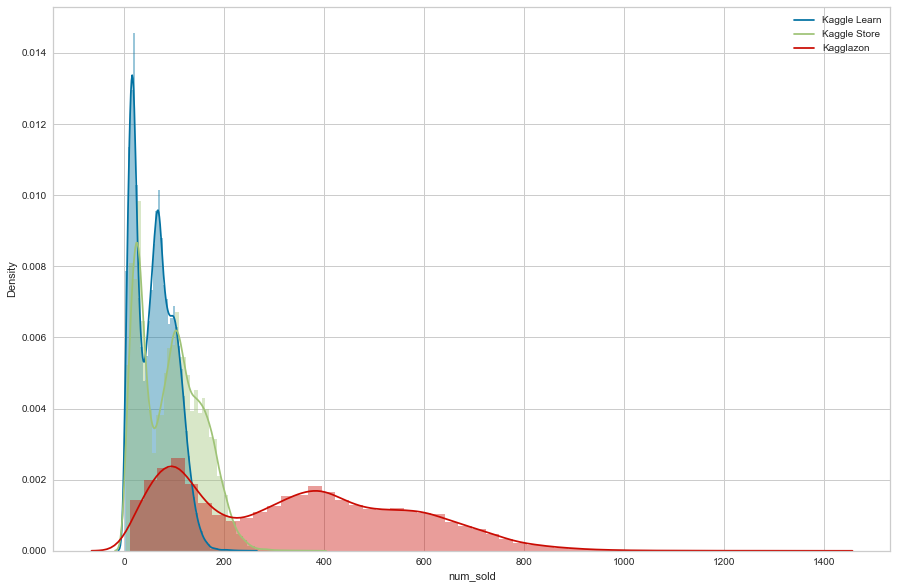

In [35]:
plt.figure(figsize=(15,10))
for i in train.store.unique():
    sns.distplot(train[train['store']==i]['num_sold'])
plt.legend(train.store.unique())

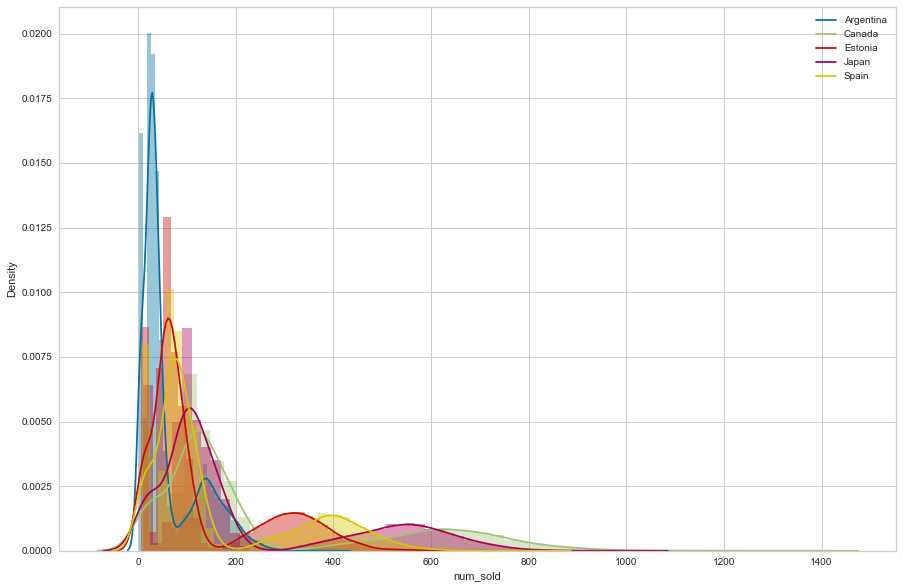

In [34]:
plt.figure(figsize=(15,10))
for i in train.country.unique():
    sns.distplot(train[train['country']==i]['num_sold'])
plt.legend(train.country.unique())

In [15]:
train.store.value_counts()

Kaggle Learn    45650
Kaggle Store    45650
Kagglazon       45650
Name: store, dtype: int64

In [24]:
train.country.value_counts()

Argentina    27390
Canada       27390
Estonia      27390
Japan        27390
Spain        27390
Name: country, dtype: int64

In [44]:
train[(train['country']=='Spain')&(train['store']=='Kagglazon')]['product']

70                     Using LLMs to Improve Your Coding
71                         Using LLMs to Train More LLMs
72        Using LLMs to Win Friends and Influence People
73            Using LLMs to Win More Kaggle Competitions
74                            Using LLMs to Write Better
                               ...                      
136945                 Using LLMs to Improve Your Coding
136946                     Using LLMs to Train More LLMs
136947    Using LLMs to Win Friends and Influence People
136948        Using LLMs to Win More Kaggle Competitions
136949                        Using LLMs to Write Better
Name: product, Length: 9130, dtype: object

In [46]:
train[(train['country']=='Japan')&(train['store']=='Kagglazon')]['product'].value_counts()

Using LLMs to Improve Your Coding                 1826
Using LLMs to Train More LLMs                     1826
Using LLMs to Win Friends and Influence People    1826
Using LLMs to Win More Kaggle Competitions        1826
Using LLMs to Write Better                        1826
Name: product, dtype: int64

---

# simple submission

In [68]:
data_patiotion = []
for i in train['country'].unique():
    for j in train['store'].unique():
        for k in train['product'].unique():
            tp = (train[(train['country']==i)&(train['store']==j)&(train['product']==k)])
            tp = tp.reset_index(drop=True)
            data_patiotion.append(tp)
data_patiotion

[          id        date    country         store  \
 0          0  2017-01-01  Argentina  Kaggle Learn   
 1         75  2017-01-02  Argentina  Kaggle Learn   
 2        150  2017-01-03  Argentina  Kaggle Learn   
 3        225  2017-01-04  Argentina  Kaggle Learn   
 4        300  2017-01-05  Argentina  Kaggle Learn   
 ...      ...         ...        ...           ...   
 1821  136575  2021-12-27  Argentina  Kaggle Learn   
 1822  136650  2021-12-28  Argentina  Kaggle Learn   
 1823  136725  2021-12-29  Argentina  Kaggle Learn   
 1824  136800  2021-12-30  Argentina  Kaggle Learn   
 1825  136875  2021-12-31  Argentina  Kaggle Learn   
 
                                 product  num_sold  
 0     Using LLMs to Improve Your Coding        63  
 1     Using LLMs to Improve Your Coding        51  
 2     Using LLMs to Improve Your Coding        44  
 3     Using LLMs to Improve Your Coding        44  
 4     Using LLMs to Improve Your Coding        40  
 ...                            

In [78]:
train = pd.read_csv('./train.csv')

tp = [i.split('-') for i in train['date']]
train['year'] = [i[0] for i in tp]
train['month'] = [i[1] for i in tp]
train['day'] = [i[2] for i in tp]
train = train.drop(['year','date','id'],axis=1)
train.groupby(['month','day','country','store','product']).mean().reset_index()

,month,day,country,store,product,num_sold
0,01,01,Argentina,Kagglazon,Using LLMs to Improve Your Coding,224.6
1,01,01,Argentina,Kagglazon,Using LLMs to Train More LLMs,221.2
2,01,01,Argentina,Kagglazon,Using LLMs to Win Friends and Influence People,34.0
3,01,01,Argentina,Kagglazon,Using LLMs to Win More Kaggle Competitions,218.0
4,01,01,Argentina,Kagglazon,Using LLMs to Write Better,175.2
...,...,...,...,...,...,...
27445,12,31,Spain,Kaggle Store,Using LLMs to Improve Your Coding,173.4
27446,12,31,Spain,Kaggle Store,Using LLMs to Train More LLMs,175.6
27447,12,31,Spain,Kaggle Store,Using LLMs to Win Friends and Influence People,27.4
27448,12,31,Spain,Kaggle Store,Using LLMs to Win More Kaggle Competitions,168.2


In [79]:
test

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better
...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions


In [98]:
train = pd.read_csv('./train.csv')
print(train['date'].unique()[365*2:365*3])
print(test['date'].unique())

['2019-01-01' '2019-01-02' '2019-01-03' '2019-01-04' '2019-01-05'
 '2019-01-06' '2019-01-07' '2019-01-08' '2019-01-09' '2019-01-10'
 '2019-01-11' '2019-01-12' '2019-01-13' '2019-01-14' '2019-01-15'
 '2019-01-16' '2019-01-17' '2019-01-18' '2019-01-19' '2019-01-20'
 '2019-01-21' '2019-01-22' '2019-01-23' '2019-01-24' '2019-01-25'
 '2019-01-26' '2019-01-27' '2019-01-28' '2019-01-29' '2019-01-30'
 '2019-01-31' '2019-02-01' '2019-02-02' '2019-02-03' '2019-02-04'
 '2019-02-05' '2019-02-06' '2019-02-07' '2019-02-08' '2019-02-09'
 '2019-02-10' '2019-02-11' '2019-02-12' '2019-02-13' '2019-02-14'
 '2019-02-15' '2019-02-16' '2019-02-17' '2019-02-18' '2019-02-19'
 '2019-02-20' '2019-02-21' '2019-02-22' '2019-02-23' '2019-02-24'
 '2019-02-25' '2019-02-26' '2019-02-27' '2019-02-28' '2019-03-01'
 '2019-03-02' '2019-03-03' '2019-03-04' '2019-03-05' '2019-03-06'
 '2019-03-07' '2019-03-08' '2019-03-09' '2019-03-10' '2019-03-11'
 '2019-03-12' '2019-03-13' '2019-03-14' '2019-03-15' '2019-03-16'
 '2019-03-

---

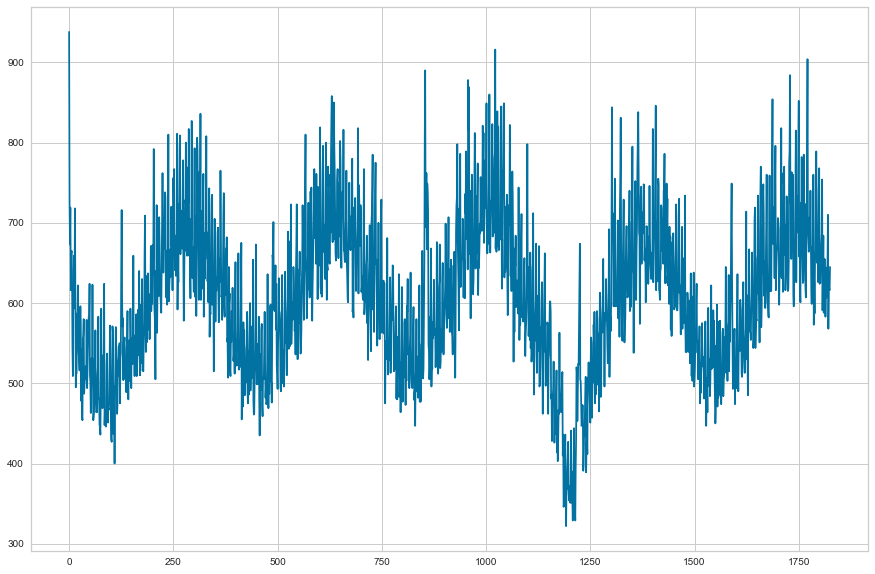

In [56]:
plt.figure(figsize=(15,10))
target = train[(train['country']=='Japan')&(train['store']=='Kagglazon')&(train['product']=='Using LLMs to Improve Your Coding')]['num_sold']
target = target.reset_index(drop=True)
plt.plot(target)

In [66]:
from pycaret.time_series import *
setup(data=train['num_sold'],fh=2)

,Description,Value
0,session_id,3502
1,Target,num_sold
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(136950, 1)"
5,Transformed data shape,"(136950, 1)"
6,Transformed train set shape,"(136948, 1)"
7,Transformed test set shape,"(2, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter
